# 1.0 Data Source

The dataset utilized in this project was obtained from ..............
The licence....................

# 2.0 Data Description

In [1]:
# nigeria_age.csv

# nigeria_asfr.csv

# nigeria_deaths.csv

# Menegitis.csv

#### nigeria_age.csv columns

 Age - No. of Years since a persons birth

 Value - No. of people with the corresponding age 


###### nigeria_asfr.csv

Time - Refers to the observation year 

Agegroup- Refers to age of data subjects

ASFR- Refers to age-specific fertility rates, calculated as  the number of births during the reference year to females 
    of a specified age at the time of the birth, divided by the number of females of that age in that reference year
    
PASFR - projections of percent age-specific fertility rate (PASFR)

Births- Total No. of births that year for females of that agegroup  

###### nigeria_deaths.csv

Time - Refers to year of observations

Sex - Refers to gender of data subject

Agegrpstart- First number of that age group e.g if age group is 0-1, then Agegrpstart is 0, if 1-5 Agegrpstart is 1

MX- the number of deaths during the year divided by the average number alive during the year

###### Menengitis.csv

Gender - gender of data subject, Male/Female

Settlement - Type of settlement, urban/rural

Report_Year -Year the menegitis case was reported

age - age of the data subject

disease - Menegitis

health_status - Whether dead or alive


# 3.0 EDA

In [51]:
# import libraries

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import numpy as np


##### 3.1 Age Dataset

In [3]:
df_age=pd.read_csv('nigeria_age.csv')

In [7]:
df_age.head()

,age,value
0,0,4245.106
1,1,3876.368
2,2,3651.807
3,3,3471.144
4,4,3323.187


In [9]:
df_age.tail(10)

,age,value
91,91,3.765
92,92,2.539
93,93,1.675
94,94,1.086
95,95,0.681
96,96,0.418
97,97,0.248
98,98,0.141
99,99,0.078
100,100,0.082


In [11]:
df_age.sample(10)

,age,value
6,6,3071.083
72,72,198.284
45,45,768.612
68,68,278.540
7,7,2981.034
66,66,320.160
36,36,1116.448
93,93,1.675
85,85,24.437
100,100,0.082


In [4]:
df_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     101 non-null    int64  
 1   value   101 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [6]:
df_age.describe()

,age,value
count,101.000000,101.000000
mean,50.000000,1057.621832
std,29.300171,1091.564871
min,0.000000,0.078000
25%,25.000000,143.587000
50%,50.000000,713.772000
75%,75.000000,1614.130000
max,100.000000,4245.106000


In [82]:
df_age.isnull().sum()

age      0
value    0
dtype: int64

##### 3.2 Deaths dataset

In [13]:
df_deaths=pd.read_csv('nigeria_deaths.csv')

In [14]:
df_deaths.head()

,Time,Sex,AgeGrpStart,mx
0,1990,Male,0,0.142211
1,1990,Male,1,0.027905
2,1990,Male,5,0.008949
3,1990,Male,10,0.004625
4,1990,Male,15,0.005461


In [15]:
df_deaths.tail()

,Time,Sex,AgeGrpStart,mx
215,2030,Female,80,0.152682
216,2030,Female,85,0.225731
217,2030,Female,90,0.333914
218,2030,Female,95,0.450812
219,2030,Female,100,0.602591


In [16]:
df_deaths.sample(5)

,Time,Sex,AgeGrpStart,mx
68,2020,Male,5,0.006316
181,2020,Female,20,0.005596
76,2020,Male,45,0.012449
44,2010,Male,0,0.096473
142,2000,Female,45,0.011928


In [17]:
df_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Time         220 non-null    int64  
 1   Sex          220 non-null    object 
 2   AgeGrpStart  220 non-null    int64  
 3   mx           220 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 7.0+ KB


In [18]:
df_deaths.describe()

,Time,AgeGrpStart,mx
count,220.000000,220.000000,220.000000
mean,2010.000000,47.772727,0.109045
std,14.174387,31.363143,0.172870
min,1990.000000,0.000000,0.003220
25%,2000.000000,20.000000,0.008475
50%,2010.000000,47.500000,0.019650
75%,2020.000000,75.000000,0.115756
max,2030.000000,100.000000,0.699203


In [57]:
df_deaths.isnull().sum()

Time           0
Sex            0
AgeGrpStart    0
mx             0
dtype: int64

In [20]:
df_deaths.columns

Index(['Time', 'Sex', 'AgeGrpStart', 'mx'], dtype='object')

In [23]:
# Find the minimum and maximum years in the 'Time' column (Timeline  of the dataset)

min_year = df_deaths['Time'].min()
max_year = df_deaths['Time'].max()

print("Timeline for the dataset: From {} to {}".format(min_year, max_year))

Timeline for the dataset: From 1990 to 2030


In [59]:
df_deaths['Time'].unique()

array([1990, 2000, 2010, 2020, 2030], dtype=int64)

In [26]:
# find the minimum and maximum age in the 'AgeGrpStart' (age range of dataset)

min_age=df_deaths['AgeGrpStart'].min()

max_age=df_deaths['AgeGrpStart'].max()

print("Age range for the dataset: From {} to {} Years".format(min_age, max_age))

Age range for the dataset: From 0 to 100 Years


##### Time series plot for MX values of Agegroupstart0 - Mortality rate for below age 1

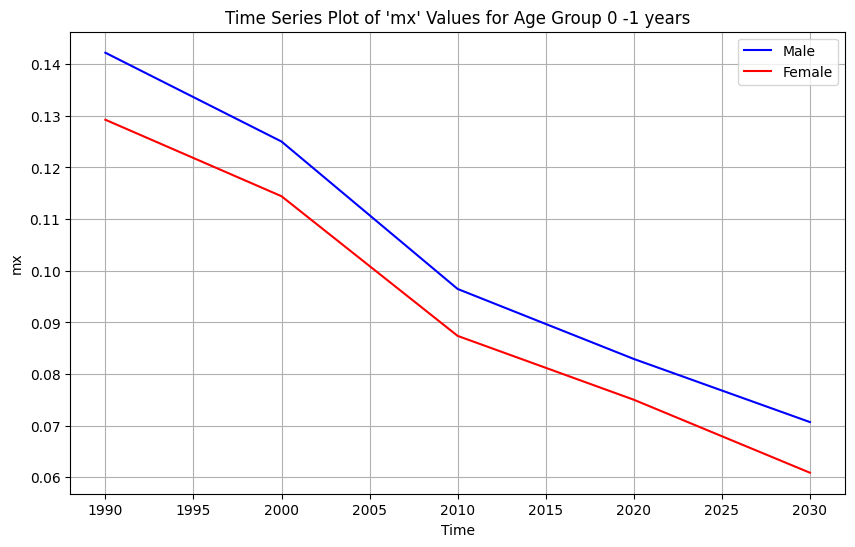

In [42]:
age_grp_0_data = df_deaths[df_deaths['AgeGrpStart'] == 0]

# Separate data for males and females
male_data = age_grp_0_data[age_grp_0_data['Sex'] == 'Male']
female_data = age_grp_0_data[age_grp_0_data['Sex'] == 'Female']

# Plot settings
plt.figure(figsize=(10, 6))
plt.title("Time Series Plot of 'mx' Values for Age Group 0 -1 years")
plt.xlabel("Time")
plt.ylabel("mx")

# Plotting 'mx' values over time for males and females
plt.plot(male_data['Time'], male_data['mx'], label="Male", color='blue')
plt.plot(female_data['Time'], female_data['mx'], label="Female", color='red')

plt.legend()
plt.grid(True)
plt.show()


The Mortality rate is decreasing among children below 1 year

##### Time series for Mortality rate children ages 1 - 5

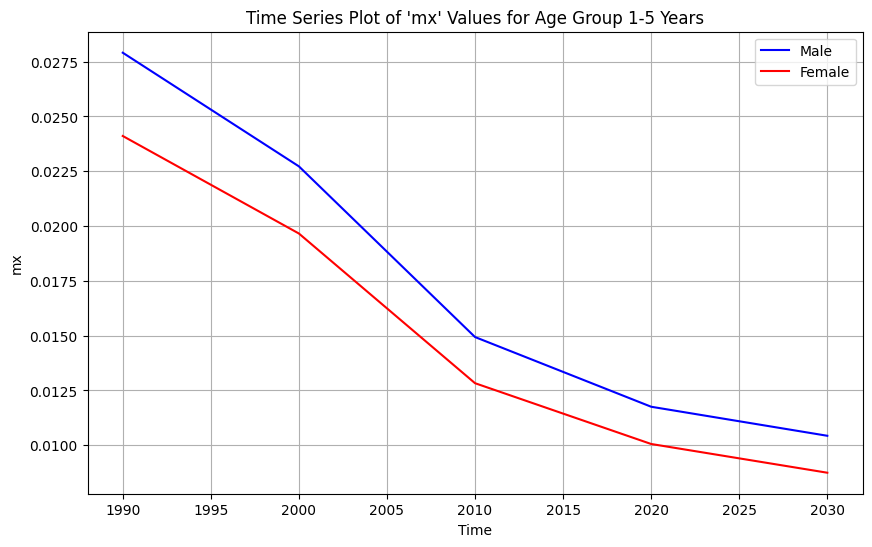

In [44]:
age_grp_1_data = df_deaths[df_deaths['AgeGrpStart'] == 1]

# Separate data for males and females
male_data = age_grp_1_data[age_grp_1_data['Sex'] == 'Male']
female_data = age_grp_1_data[age_grp_1_data['Sex'] == 'Female']

# Plot settings
plt.figure(figsize=(10, 6))
plt.title("Time Series Plot of 'mx' Values for Age Group 1-5 Years")
plt.xlabel("Time")
plt.ylabel("mx")

# Plotting 'mx' values over time for males and females
plt.plot(male_data['Time'], male_data['mx'], label="Male", color='blue')
plt.plot(female_data['Time'], female_data['mx'], label="Female", color='red')

plt.legend()
plt.grid(True)
plt.show()


Mortality Rate decreases for ages 1-5 from the year 1990 

##### Histogram of the 'mx' values in our dataset to visualize the distribution of mortality rate in our dataset

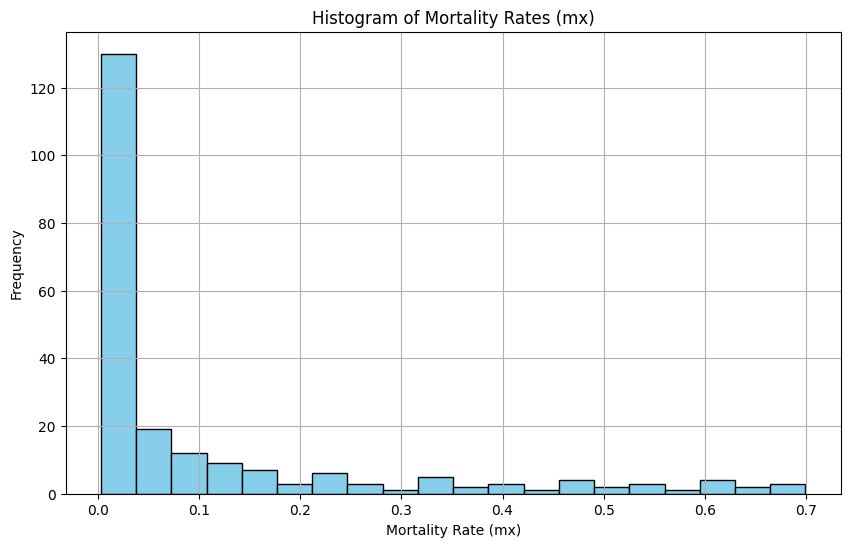

In [53]:
# Plot settings
plt.figure(figsize=(10, 6))
plt.hist(df_deaths['mx'], bins=20, color='skyblue', edgecolor='black')  
plt.title('Histogram of Mortality Rates (mx)')
plt.xlabel('Mortality Rate (mx)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


##### Which years and ages had the highest and lowest mortality rates for each gender as of 2023

In [46]:
# Filter the DataFrame to include only years up to 2023
df_filtered = df_deaths[df_deaths['Time']<= 2023]

# Find the indices of the rows with the highest and lowest mortality rates for each sex
max_indices = df_filtered.groupby('Sex')['mx'].idxmax()
min_indices = df_filtered.groupby('Sex')['mx'].idxmin()

# Retrieve the rows with the highest and lowest mortality rates for each sex
max_mortality = df_filtered.loc[max_indices]
min_mortality = df_filtered.loc[min_indices]

# Display the results
print("Highest Mortality Rates:")
print(max_mortality)

print("\nLowest Mortality Rates:")
print(min_mortality)


Highest Mortality Rates:
     Time     Sex  AgeGrpStart        mx
197  2020  Female          100  0.601721
87   2020    Male          100  0.699203

Lowest Mortality Rates:
     Time     Sex  AgeGrpStart        mx
179  2020  Female           10  0.004209
69   2020    Male           10  0.003542


##### Which years and ages had the highest and lowest mortality rates for each gender as of 2023 - (persons below 50 years)

In [47]:
# Filter the DataFrame to include only years up to 2023 and age groups under 50
df_filtered = df_deaths[(df_deaths['Time'] <= 2023) & (df_deaths['AgeGrpStart'] < 50)]

# Find the indices of the rows with the highest and lowest mortality rates for each sex
max_indices = df_filtered.groupby('Sex')['mx'].idxmax()
min_indices = df_filtered.groupby('Sex')['mx'].idxmin()

# Retrieve the rows with the highest and lowest mortality rates for each sex
max_mortality = df_filtered.loc[max_indices]
min_mortality = df_filtered.loc[min_indices]

# Display the results
print("Highest Mortality Rates:")
print(max_mortality)

print("\nLowest Mortality Rates:")
print(min_mortality)


Highest Mortality Rates:
     Time     Sex  AgeGrpStart        mx
110  1990  Female            0  0.129235
0    1990    Male            0  0.142211

Lowest Mortality Rates:
     Time     Sex  AgeGrpStart        mx
179  2020  Female           10  0.004209
69   2020    Male           10  0.003542


##### Top 10 highest and lowest mortality rate

In [49]:
# Filter the DataFrame to include only years up to 2023 and age groups under 50
df_filtered = df_deaths[(df_deaths['Time'] <= 2023) & (df_deaths['AgeGrpStart'] < 50)]

# Find the top 10 highest and lowest mortality rates for each sex
top_10_highest = df_filtered.groupby('Sex').apply(lambda x: x.nlargest(10, 'mx')).reset_index(drop=True)
top_10_lowest = df_filtered.groupby('Sex').apply(lambda x: x.nsmallest(10, 'mx')).reset_index(drop=True)

# Display the results
print("Top 10 Highest Mortality Rates:")
print(top_10_highest)

print("\nTop 10 Lowest Mortality Rates:")
print(top_10_lowest)


Top 10 Highest Mortality Rates:
    Time     Sex  AgeGrpStart        mx
0   1990  Female            0  0.129235
1   2000  Female            0  0.114426
2   2010  Female            0  0.087388
3   2020  Female            0  0.075031
4   1990  Female            1  0.024107
5   2000  Female            1  0.019659
6   2010  Female            1  0.012831
7   2000  Female           45  0.011928
8   2010  Female           45  0.011584
9   1990  Female           45  0.011376
10  1990    Male            0  0.142211
11  2000    Male            0  0.125016
12  2010    Male            0  0.096473
13  2020    Male            0  0.082924
14  1990    Male            1  0.027905
15  2000    Male            1  0.022722
16  2010    Male            1  0.014936
17  2000    Male           45  0.014492
18  1990    Male           45  0.014346
19  2010    Male           45  0.012957

Top 10 Lowest Mortality Rates:
    Time     Sex  AgeGrpStart        mx
0   2020  Female           10  0.004209
1   2010  Female

##### Heatmap of 'mx' to visualize how Mortality rates vary across different age groups and years

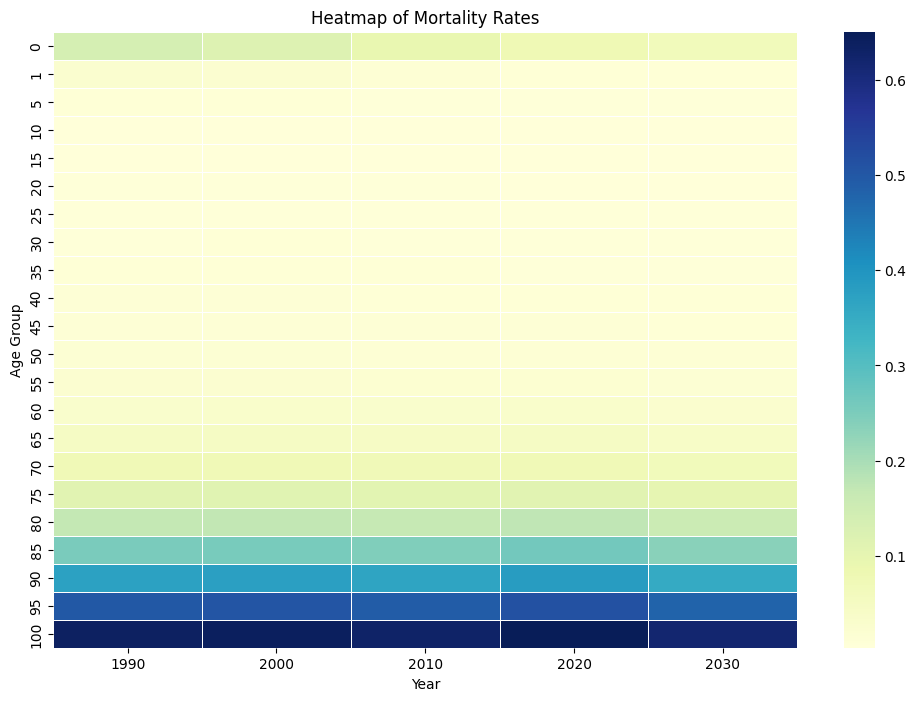

In [54]:
# Pivot the DataFrame to create a matrix where rows represent age groups, columns represent years, and cells represent mx values
heatmap_data = df_deaths.pivot_table(index='AgeGrpStart', columns='Time', values='mx')

# Plot settings
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', linewidths=0.5)  # Adjust the colormap as needed
plt.title('Heatmap of Mortality Rates')
plt.xlabel('Year')
plt.ylabel('Age Group')
plt.show()


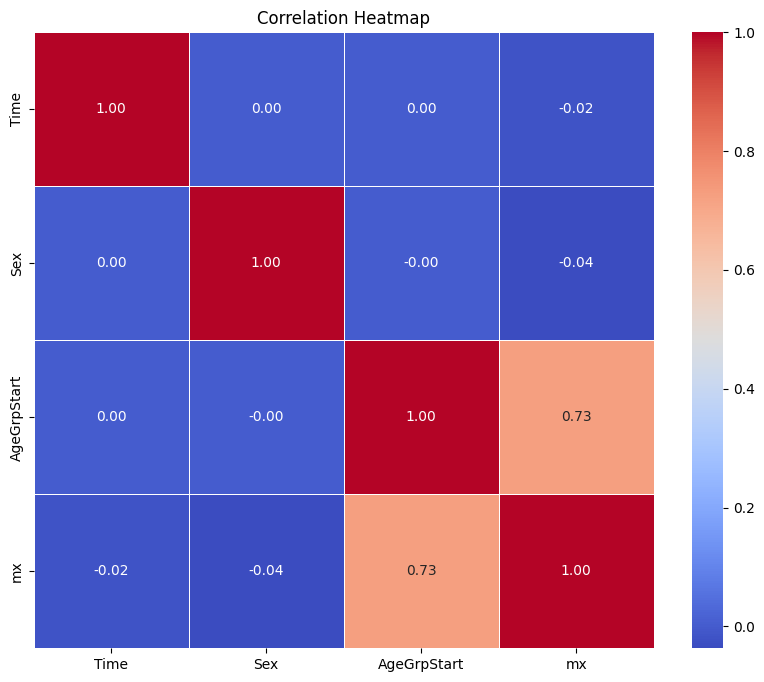

In [56]:
# Encode 'Sex' column as numeric (0 for 'Male', 1 for 'Female')
df_deaths['Sex'] = df_deaths['Sex'].map({'Male': 0, 'Female': 1})

# Calculate the correlation matrix
correlation_matrix = df_deaths.corr()

# Plot settings
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


There seems to be a high correlation between age group and mortality rate

## 3.3 ASFR dataset

In [60]:
df_asfr=pd.read_csv('nigeria_asfr.csv')

In [61]:
df_asfr.head()

,Time,AgeGrp,ASFR,PASFR,Births
0,1990,15,71.229,1.103,74.521
1,1990,16,111.213,1.722,110.959
2,1990,17,148.605,2.301,141.506
3,1990,18,180.820,2.800,164.949
4,1990,19,208.035,3.221,181.575


In [62]:
df_asfr.tail()

,Time,AgeGrp,ASFR,PASFR,Births
1430,2030,45,25.959,0.583,28.104
1431,2030,46,19.997,0.449,21.171
1432,2030,47,15.376,0.345,15.821
1433,2030,48,11.671,0.262,11.609
1434,2030,49,7.645,0.172,7.356


In [64]:
df_asfr.sample (5)

,Time,AgeGrp,ASFR,PASFR,Births
7,1990,22,258.942,4.009,201.550
305,1998,40,129.944,2.141,69.006
651,2008,36,202.087,3.325,163.066
891,2015,31,241.087,4.293,293.815
89,1992,34,228.146,3.570,127.869


In [66]:
df_asfr.isnull().sum()

Time      0
AgeGrp    0
ASFR      0
PASFR     0
Births    0
dtype: int64

In [67]:
df_asfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    1435 non-null   int64  
 1   AgeGrp  1435 non-null   int64  
 2   ASFR    1435 non-null   float64
 3   PASFR   1435 non-null   float64
 4   Births  1435 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 56.2 KB


In [68]:
df_asfr.describe()

,Time,AgeGrp,ASFR,PASFR,Births
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,2010.000000,32.000000,161.760494,2.832964,186.313438
std,11.836284,10.103026,83.651430,1.451556,126.841002
min,1990.000000,15.000000,7.645000,0.172000,5.139000
25%,2000.000000,23.000000,84.876500,1.483500,74.958000
50%,2010.000000,32.000000,179.265000,3.194000,178.723000
75%,2020.000000,41.000000,236.932500,4.189000,281.304500
max,2030.000000,49.000000,287.648000,4.931000,507.412000


In [70]:
df_asfr['AgeGrp'].unique()

array([15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
       32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48,
       49], dtype=int64)

In [71]:
df_asfr['Time'].unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022,
       2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030], dtype=int64)

##### Time series of Number of Births

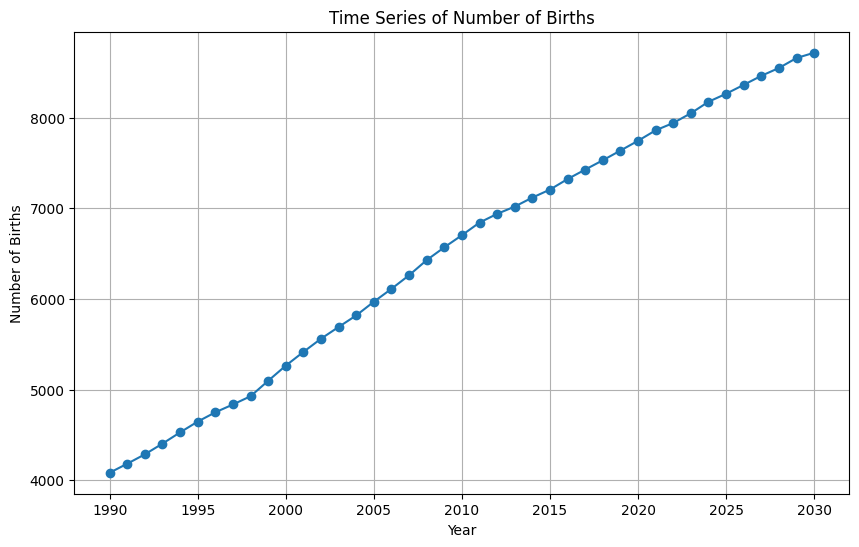

In [72]:
# Group by 'Time' and sum the 'Births' for each year
births_by_year = df_asfr.groupby('Time')['Births'].sum()

# Plot the time series of the number of births over time
plt.figure(figsize=(10, 6))
births_by_year.plot(marker='o', linestyle='-')
plt.title('Time Series of Number of Births')
plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.grid(True)
plt.show()


##### Distribution of fertility rates

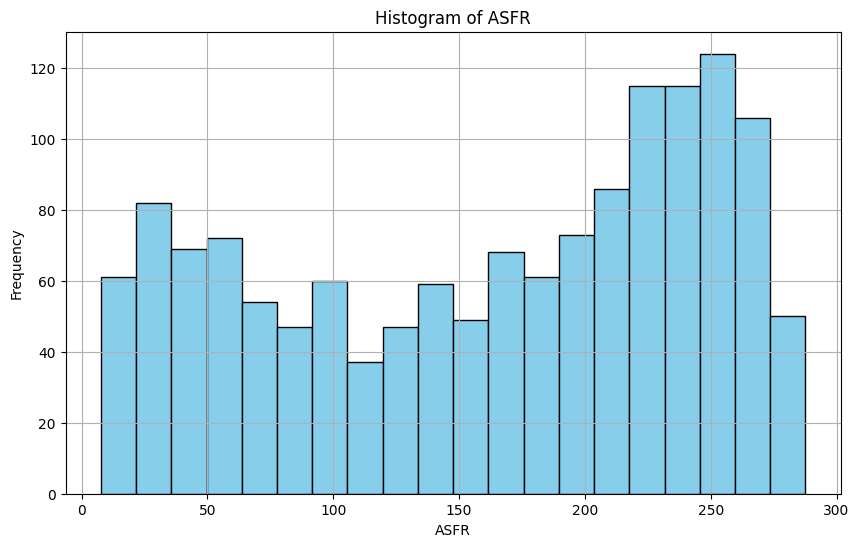

In [78]:
# Plot settings
plt.figure(figsize=(10, 6))

# Create histogram of ASFR values
plt.hist(df_asfr['ASFR'], bins=20, color='skyblue', edgecolor='black')  

# Add labels and title
plt.title('Histogram of ASFR')
plt.xlabel('ASFR')
plt.ylabel('Frequency')
plt.grid(True)

# Show plot
plt.show()


##### Fertility rates across ages for each year

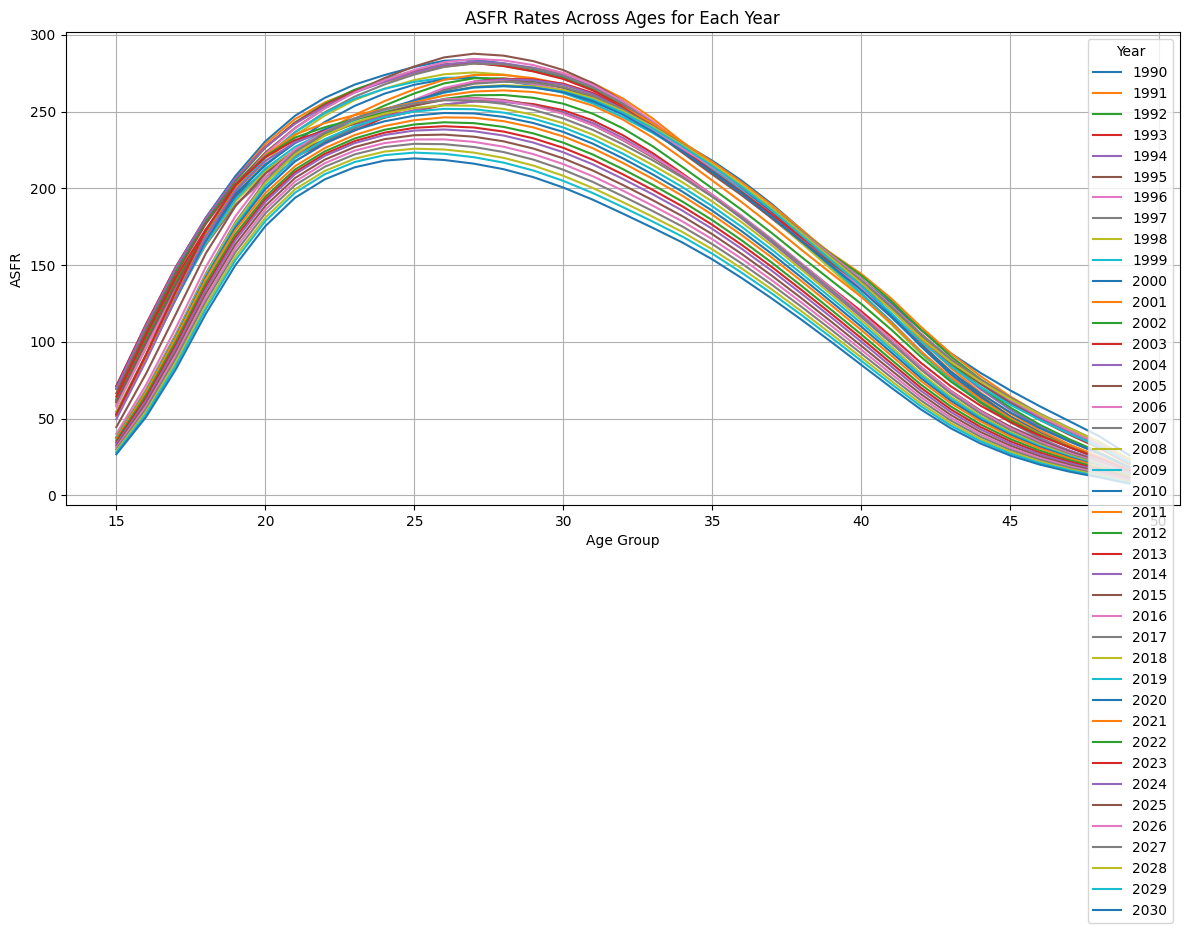

In [74]:
# Pivot the DataFrame to create a matrix where rows represent years, columns represent age groups, and values represent ASFR rates
pivot_df = df_asfr.pivot(index='Time', columns='AgeGrp', values='ASFR')

# Plot settings
plt.figure(figsize=(12, 8))

# Plot ASFR rates across ages for each year
for year in pivot_df.index:
    plt.plot(pivot_df.columns, pivot_df.loc[year], label=year)

# Add labels and title
plt.title('ASFR Rates Across Ages for Each Year')
plt.xlabel('Age Group')
plt.ylabel('ASFR')
plt.legend(title='Year', loc='upper right')
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()


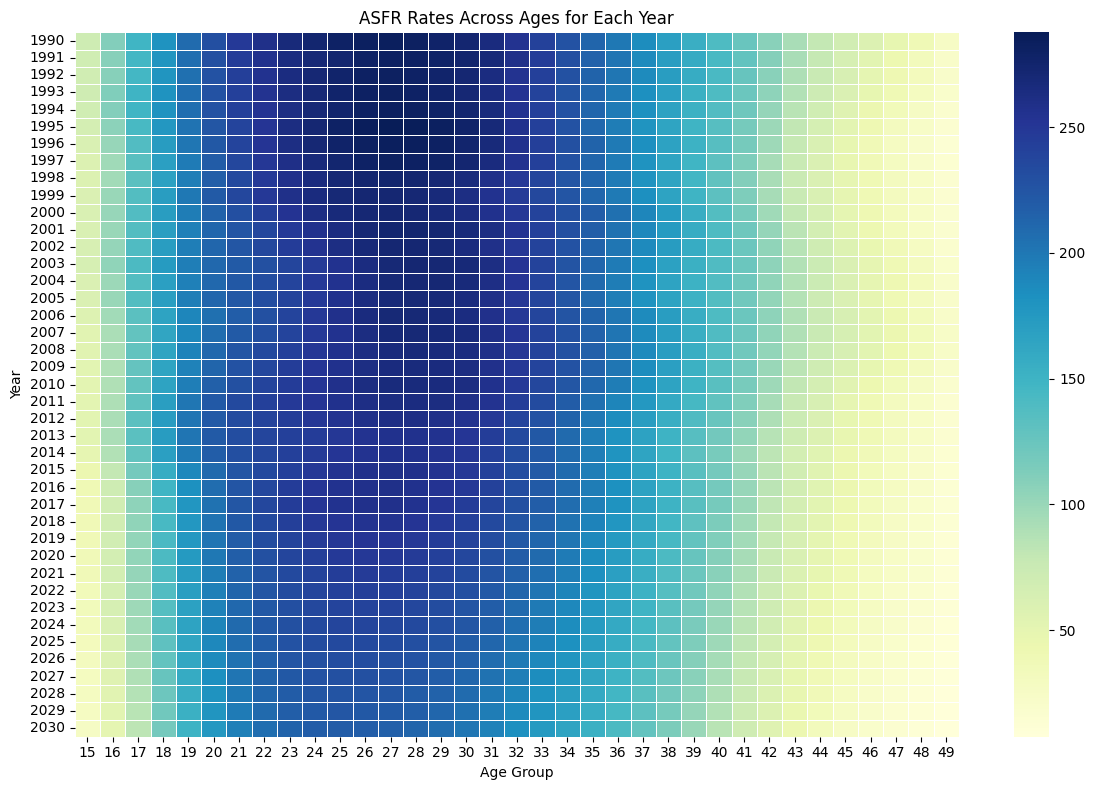

In [75]:
# Pivot the DataFrame to create a matrix where rows represent years, columns represent age groups, and values represent ASFR rates
pivot_df = df_asfr.pivot(index='Time', columns='AgeGrp', values='ASFR')

# Plot settings
plt.figure(figsize=(12, 8))

# Create heatmap
sns.heatmap(pivot_df, cmap='YlGnBu', linewidths=0.5)

# Add labels and title
plt.title('ASFR Rates Across Ages for Each Year')
plt.xlabel('Age Group')
plt.ylabel('Year')

# Show plot
plt.tight_layout()
plt.show()


##### Time series of fertility rates

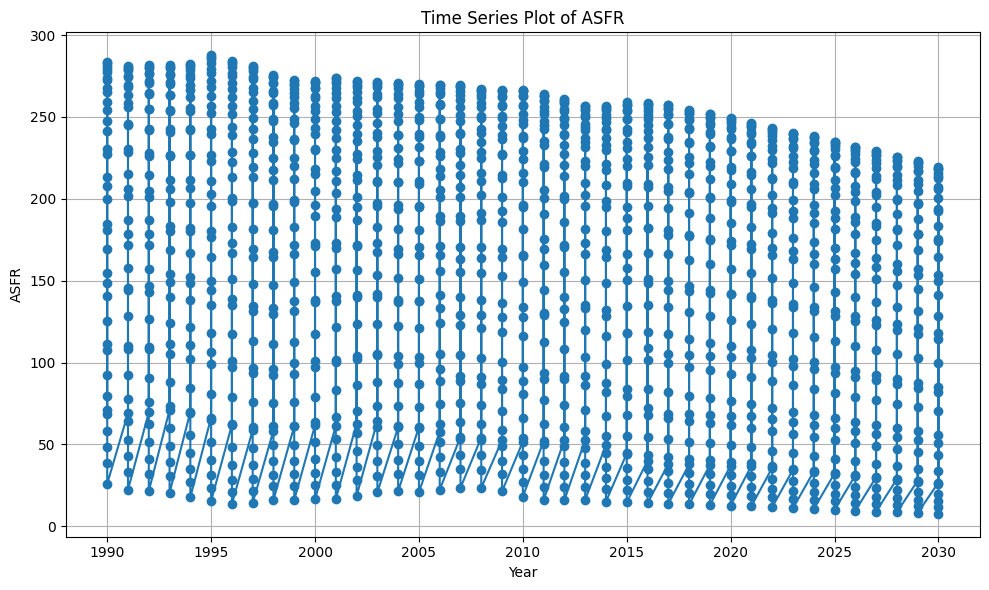

In [77]:
# Plot settings
plt.figure(figsize=(10, 6))

# Plot ASFR values over time
plt.plot(df_asfr['Time'], df_asfr['ASFR'], marker='o', linestyle='-')

# Add labels and title
plt.title('Time Series Plot of ASFR')
plt.xlabel('Year')
plt.ylabel('ASFR')
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()


C:\Users\fmogire\AppData\Local\Temp\ipykernel_3124\3877092110.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Time', y='ASFR', data=df_asfr, palette='muted')


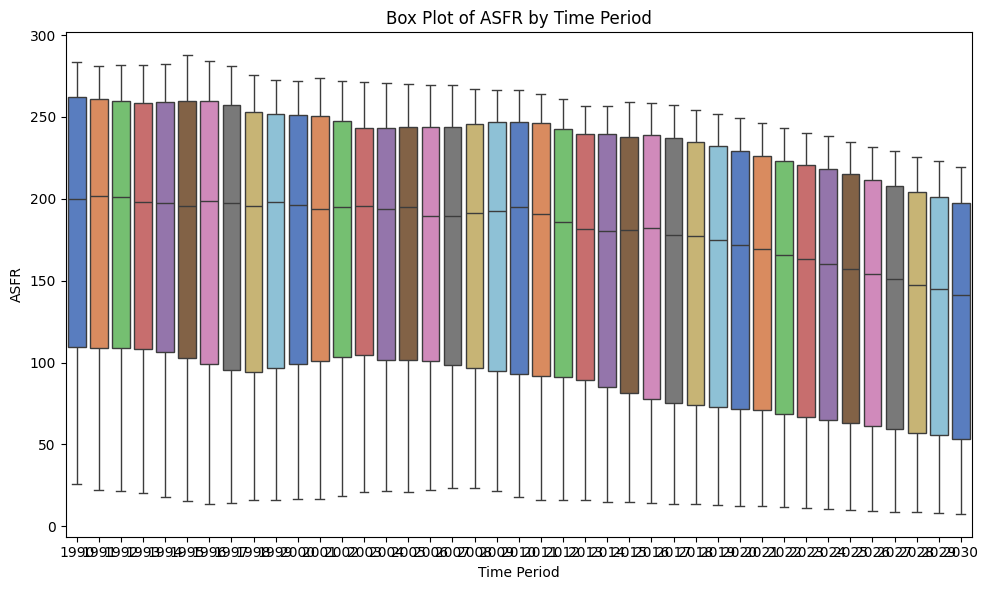

In [79]:
# Plot settings
plt.figure(figsize=(10, 6))

# Create box plot of ASFR values by time period
sns.boxplot(x='Time', y='ASFR', data=df_asfr, palette='muted')

# Add labels and title
plt.title('Box Plot of ASFR by Time Period')
plt.xlabel('Time Period')
plt.ylabel('ASFR')

# Show plot
plt.tight_layout()
plt.show()


##### ASFR vs PASFR : to explore the relationship between age-specific fertility rates and per-age specific fertility rates

N/B : In general, ASFR represents the fertility rate for a specific age group, while PASFR represents the fertility rate for a specific age at a given time. The relationship between ASFR and PASFR may be influenced by factors such as socioeconomic conditions, cultural norms, healthcare access, and fertility patterns.

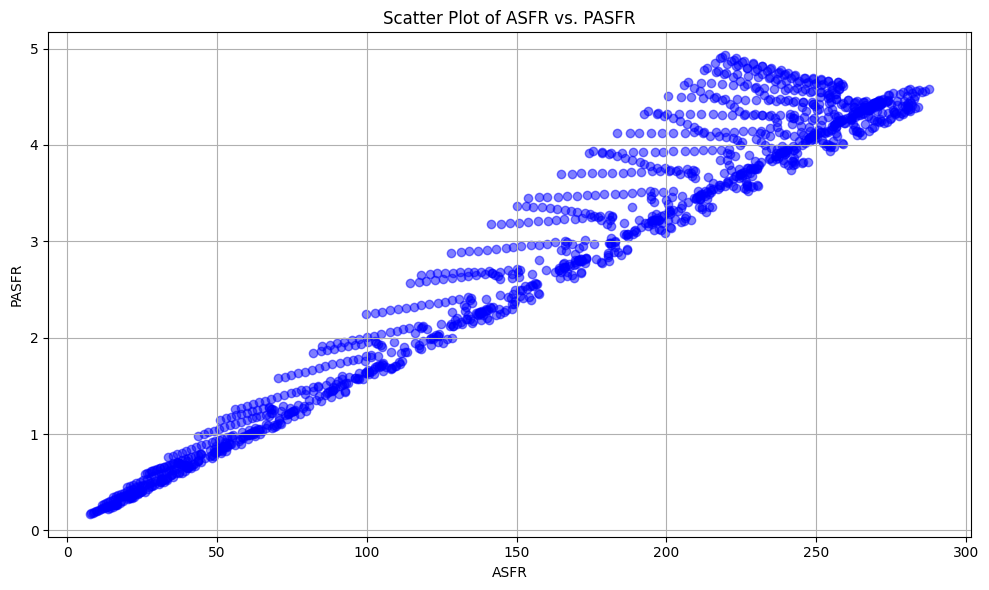

In [80]:
# Plot settings
plt.figure(figsize=(10, 6))

# Create scatter plot of ASFR vs. PASFR
plt.scatter(df_asfr['ASFR'], df_asfr['PASFR'], alpha=0.5, color='blue')

# Add labels and title
plt.title('Scatter Plot of ASFR vs. PASFR')
plt.xlabel('ASFR')
plt.ylabel('PASFR')

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()
